In [1]:
%cd /data/ai_club/team_C

/data/ai_club/team_C


In [2]:
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
import random
import matplotlib.pyplot as plt

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', 

In [3]:
data_train = np.load('CNN/spectral_lymph_tile_array_3_9_22_left_update_1.npy')
non_data_train = np.load('CNN/spectral_non_tile_array_3_9_22_left_update_1.npy')
data_test = np.load('CNN/spectral_lymph_tile_array_3_9_22_right_update_1.npy')
non_data_test = np.load('CNN/spectral_non_tile_array_3_9_22_right_update_1.npy')
##OLD (non-split)
#data_old = np.load('spectral_lymph_tile_array.npy')
#non_data_old = np.load('spectral_non_lymph_tile_array.npy')
#X_old = np.vstack((data_old, non_data_old))
#labels_old = np.append(np.ones(data_old.shape[0]), np.zeros(non_data_old.shape[0]))
#print(data_train==non_data_train)

In [4]:
#Shuffle function ot shuffle arrays found at https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison (Not used)
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [8]:
#X_train , X_test , y_train, y_test = train_test_split(X, labels, random_state=0) These lines below aim to do the same thing as this commented line
data_stack_train = np.vstack((data_train, non_data_train)) # One array of all training data
data_stack_test = np.vstack((data_test, non_data_test))   # One array of all test data
labels_train = np.append(np.ones(data_train.shape[0]), np.zeros(non_data_train.shape[0])) 
labels_test = np.append(np.ones(data_test.shape[0]), np.zeros(non_data_test.shape[0]))


X_train = data_stack_train[:, :]
y_train = labels_train[:]
X_test =  data_stack_test[:, :]
y_test = labels_test[:]

#(X_train_,y_train)=shuffle_in_unison(X_train,y_train)
#(X_test,y_test)=shuffle_in_unison(X_test,y_test)


In [5]:
model=Sequential()
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu",input_shape=(17,17,394)))
model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu"))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(1,activation="sigmoid"))  
print(model.summary())
#bigger model 
#model=Sequential()
#model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu",input_shape=(17,17,394)))
#model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu"))
#model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu"))
#model.add(Flatten())
#model.add(Dense(500,activation="relu"))
#model.add(Dense(1,activation="sigmoid"))  
#print(model.summary())

W0311 13:59:13.156156 139929397765952 deprecation.py:506] From /usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 17, 17, 128)       454016    
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 16)        18448     
_________________________________________________________________
flatten (Flatten)            (None, 4624)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               2312500   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 501       
Total params: 2,785,465
Trainable params: 2,785,465
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
#dot_img_file = '/tmp/model_1.png'
#tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history=model.fit(X_train,y_train,epochs=10, validation_data=(X_test,y_test))

Train on 19011 samples, validate on 22601 samples
Epoch 1/10
19011/19011 [==============================] - 36s 2ms/sample - loss: 0.4294 - acc: 0.7804 - val_loss: 0.2693 - val_acc: 0.8925
Epoch 2/10
19011/19011 [==============================] - 33s 2ms/sample - loss: 0.1365 - acc: 0.9449 - val_loss: 0.6230 - val_acc: 0.8847
Epoch 3/10
19011/19011 [==============================] - 34s 2ms/sample - loss: 0.0666 - acc: 0.9754 - val_loss: 0.4958 - val_acc: 0.9165
Epoch 4/10
19011/19011 [==============================] - 33s 2ms/sample - loss: 0.0466 - acc: 0.9842 - val_loss: 0.1869 - val_acc: 0.9274
Epoch 5/10
19011/19011 [==============================] - 33s 2ms/sample - loss: 0.0523 - acc: 0.9826 - val_loss: 0.4638 - val_acc: 0.9271
Epoch 6/10
19011/19011 [==============================] - 34s 2ms/sample - loss: 0.0289 - acc: 0.9897 - val_loss: 0.6106 - val_acc: 0.9003
Epoch 7/10
19011/19011 [==============================] - 34s 2ms/sample - loss: 0.0164 - acc: 0.9945 - val_loss: 0.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


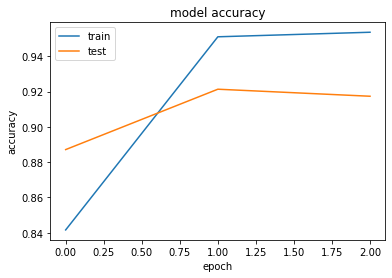

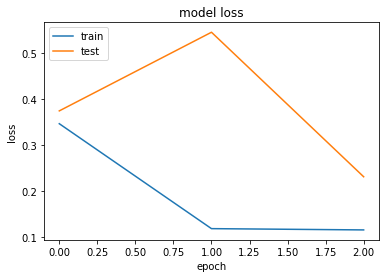

In [10]:
#visulizer based on https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test','train_2','test_2'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test','train_2','test_2'], loc='upper left')
plt.show()


In [9]:
model.evaluate(X_test, y_test)

22601/22601 [==============================] - 17s 773us/sample - loss: 0.2317 - acc: 0.9173


[0.23172108447067322, 0.9173488]

In [5]:
X_test.shape[0]/X_train.shape[0]

NameError: name 'X_test' is not defined

In [6]:
print(model.predict(X_test[:,:,:,:]))

NameError: name 'model' is not defined